In [164]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("handled-car-mpg.csv")

# Separate features (X) and target (y)
X = df.drop('mpg', axis=1).values
y = df['mpg'].values.reshape(-1, 1)


# Step 1: Shuffle the data
np.random.seed(42)  # for reproducibility
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# Step 2: 80/20 split
split_index = int(0.8 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 3: Z-score normalization (standardization) for X
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std  # use train mean & std!

# Step 4: Initialize parameters
m, n = X_train_scaled.shape
w = np.random.uniform(low=-1.0, high=1.0, size=(n, 1))
b = 0.0


In [176]:
mean

array([9.58466454e-03, 4.95207668e-01, 6.38977636e-03, 2.07667732e-01,
       2.81150160e-01, 1.70894569e+01, 1.54829744e+01, 7.96781229e+00,
       5.14426029e+00, 4.60003153e+00])

# **Multiple Linear Regression model from Scratch**

In [165]:
#Functions

def compute_cost(x, y, w, b):
    m,n = x.shape

    f_wb = np.dot(x,w) + b
    cost = (1/(2 *m)) * np.sum((f_wb - y)**2)
    return cost
    
def compute_gradient(x, y, w, b):
    m = x.shape[0]

    f_wb = np.dot(x, w) + b          # shape (m, 1)
    error = f_wb - y                 # shape (m, 1)

    dj_dw = (1/m) * np.dot(x.T, error)  # shape (n, 1)
    dj_db = (1/m) * np.sum(error)       # scalar

    return dj_dw, dj_db

def gradient_descent(lr, x, y, w, b, previous_cost, threshold, max_iters=1000000):
    m = x.shape[0]
    iters = 0
    cost_log = []
    iteration_log = []
    weight_log = []
    bias_log = []

    while True:
        
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - (lr/m)*(dj_dw)
        b = b - (lr/m)*(dj_db)

        current_cost = compute_cost(x, y, w, b)

        if iters % 100 == 0:
            print(f"Iteration {iters} | Cost: {current_cost:.5f} | w: {w.ravel()} | b: {b:.5f}")
            # if iters < 1001 and iters % 200 == 0 and iters > 1:
            #     cost_log.append(current_cost)
            #     iteration_log.append(iters)
            #     weight_log.append(w.flatten().tolist())  # Save as list
            #     bias_log.append(b)
            # elif iters < 10000 and iters > 1001 and iters % 1000 == 0:
            #     cost_log.append(current_cost)
            #     iteration_log.append(iters)
            #     weight_log.append(w.flatten().tolist())  # Save as list
            #     bias_log.append(b)
        
        # if iters % 10000 == 0:
        #     cost_log.append(current_cost)
        #     iteration_log.append(iters)
        #     weight_log.append(w.flatten().tolist())  # Save as list
        #     bias_log.append(b)
            
        if abs(current_cost-previous_cost) < threshold:
            print(f"Converged in {iters} iterations.")
            break

        previous_cost = current_cost
        iters += 1
        if iters >= max_iters:
            print("Stopped: Max iterations reached.")
            break


    return w , b # ,cost_log , iteration_log , weight_log , bias_log

def predict(x_test_scaled, w, b):
    return np.dot(x_test_scaled,w) + b
    

In [166]:
wf , bf  = gradient_descent(0.2,X_train_scaled,y_train,w,b,previous_cost=float('inf'),threshold=1e-9,max_iters=10000000)

Iteration 0 | Cost: 296.71939 | w: [ 0.65507461 -0.4530655   0.93011571 -0.08638663  0.68080578 -0.61379174
 -0.1750996   0.3949466  -0.72723533 -0.73845738] | b: 0.01480
Iteration 100 | Cost: 254.53059 | w: [ 0.58898137 -0.12008606  0.89091573 -0.16891294  0.4062192  -0.84008592
  0.00631441  0.04216307 -1.06502269 -1.07760935] | b: 1.44835
Iteration 200 | Cost: 220.72848 | w: [ 0.52399991  0.12856877  0.85155028 -0.23603558  0.2113036  -1.01924171
  0.12690953 -0.22159826 -1.31168621 -1.32681144] | b: 2.79314
Iteration 300 | Cost: 192.76974 | w: [ 0.46082147  0.31482923  0.81273948 -0.29108806  0.07439969 -1.16323816
  0.20343968 -0.41997262 -1.491572   -1.51016529] | b: 4.05466
Iteration 400 | Cost: 169.12653 | w: [ 0.39989153  0.45482504  0.77496772 -0.33658941 -0.0203406  -1.28088531
  0.24815871 -0.57029884 -1.62253411 -1.64533553] | b: 5.23807
Iteration 500 | Cost: 148.83634 | w: [ 0.34147913  0.56042815  0.73854944 -0.3744545  -0.08450687 -1.37866829
  0.27002303 -0.68529763 -1

In [167]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_train = predict(X_train_scaled, wf, bf)

# Calculate metrics
mse_t = mean_squared_error(y_train, y_pred_train)
mae_t = mean_absolute_error(y_train, y_pred_train)
r2_t = r2_score(y_train, y_pred_train)

# Print results
print(f"\n📊 Training Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse_t:.4f}")
print(f"Mean Absolute Error (MAE): {mae_t:.4f}")
print(f"R² Score: {r2_t:.4f}")


📊 Training Metrics (from sklearn):
Mean Squared Error (MSE): 8.9528
Mean Absolute Error (MAE): 2.1759
R² Score: 0.8550


## **Testing Model and Metrics**

In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred_test = predict(X_test_scaled, wf, bf)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"\n📊 Test Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



📊 Test Metrics (from sklearn):
Mean Squared Error (MSE): 6.4085
Mean Absolute Error (MAE): 2.0322
R² Score: 0.8841


In [169]:
print("Final weight (w):", wf)
print("Final bias (b):", bf)

Final weight (w): [[-0.78103318]
 [ 0.10291997]
 [ 0.13756557]
 [-0.37696422]
 [ 0.77636853]
 [-2.60103245]
 [-0.80347032]
 [-2.70218615]
 [-1.70772922]
 [-2.63906737]]
Final bias (b): 23.167092651754405


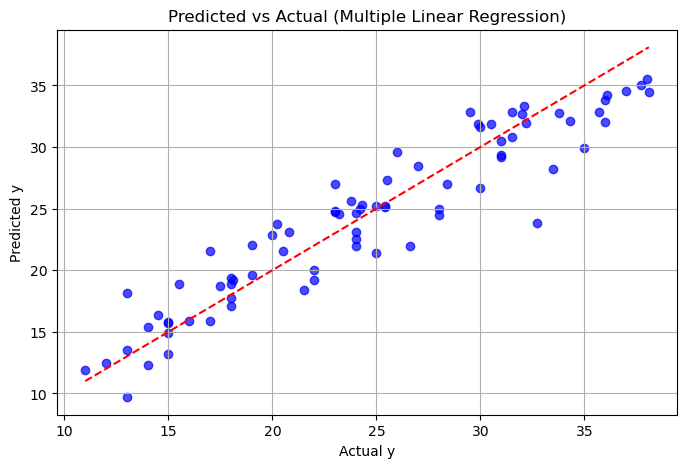

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Predicted vs Actual (Multiple Linear Regression)")
plt.grid(True)
plt.show()

# Interpretation:

✅ Test R² (0.8841) > Train R² (0.8550) — great generalization, still no overfitting

✅ MSE + MAE continue to drop on both sets — model is converging

✅ Even better test performance confirms optimization path is strong and stable

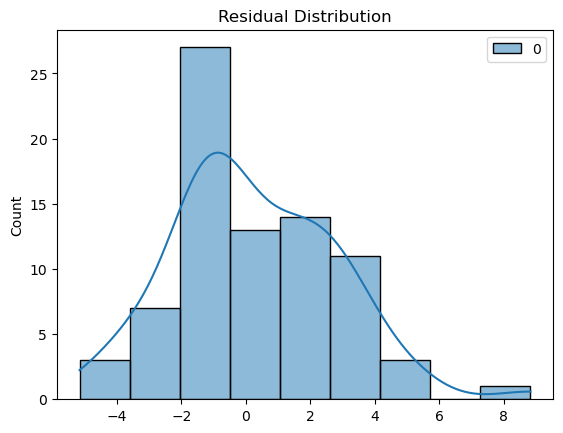

In [171]:
import seaborn as sns

residuals = y_test - y_pred_test

# Histogram works — leave as-is
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

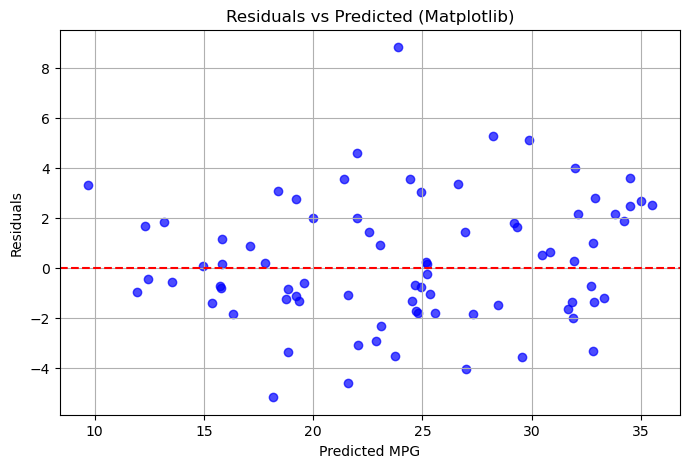

In [172]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Matplotlib)")
plt.grid(True)
plt.show()

Residuals look evenly distributed

No strong trend or shape, which means model generalized

In [173]:
#Converting logs to DataFrame
df_log = pd.DataFrame({
    'iteration': iteration_log,
    'cost': cost_log,
    'bias': bias_log,
    'weight_log' : weight_log
})

#Saving log
#df_log.to_csv('gd_convergence_log.csv', index=False)

In [174]:
# Step 1: Convert X_train_scaled to DataFrame
X_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'feature_{i}' for i in range(X_train_scaled.shape[1])])

# Step 2: Combine with y_train
df_log_Xny_train = X_scaled_df.copy()

df_log_Xny_train['y_train'] = y_train.ravel()  # or y_train.flatten()

#Saving log
#df_log_Xny_train.to_csv('X-and-y-train.csv')